From https://www.kaggle.com/code/leonidkulyk/eda-cafa5-pfp-interactive-dags-plotly

In [1]:
import os
import json
from PIL import Image
from typing import Dict
from collections import Counter

import random
import cv2
import obonet
import networkx
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.patches as mpatch
from Bio import SeqIO
from pyvis.network import Network

In [12]:
class CFG:
    train_go_obo_path: str = "../data/Train/go-basic.obo"
    train_seq_fasta_path: str = "../data/Train/train_sequences.fasta"
    train_terms_path: str = "../data/Train/train_terms.tsv"
    train_taxonomy_path: str = "../data/Train/train_taxonomy.tsv"
    train_ia_path: str = "../data/IA.txt"


class color:
    PURPLE = "\033[95m"
    CYAN = "\033[96m"
    DARKCYAN = "\033[36m"
    BLUE = "\033[94m"
    GREEN = "\033[92m"
    YELLOW = "\033[93m"
    RED = "\033[91m"
    BOLD = "\033[1m"
    UNDERLINE = "\033[4m"
    END = "\033[0m"


def plot_dag(graph, term, radius=1, filename="network.html"):
    # create smaller subgraph
    # radius - include all neighbors of distance<=radius from n (increse it to add further parent's branches).
    ng_graph = networkx.ego_graph(graph, term, radius=radius)

    for n in ng_graph.nodes(data=True):
        # concatenate label of the node with its attribute
        n[1]["label"] = n[0] + " " + n[1]["name"]

    nt = Network(directed=True, notebook=True, cdn_resources="in_line")
    nt.from_nx(ng_graph)
    return nt.show(filename)

In [3]:
graph = obonet.read_obo(CFG.train_go_obo_path)

In [5]:
%%time
Adj = networkx.to_numpy_array(graph)

CPU times: user 1.19 s, sys: 2.76 s, total: 3.95 s
Wall time: 3.97 s


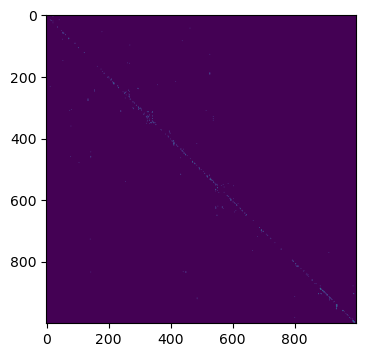

In [11]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(Adj[:1000, :1000], aspect="auto")

In [17]:
term = "GO:0034655"
graph.nodes[term]

{'name': 'nucleobase-containing compound catabolic process',
 'namespace': 'biological_process',
 'def': '"The chemical reactions and pathways resulting in the breakdown of nucleobases, nucleosides, nucleotides and nucleic acids." [GOC:mah]',
 'subset': ['goslim_chembl'],
 'synonym': ['"nucleobase, nucleoside, nucleotide and nucleic acid breakdown" EXACT []',
  '"nucleobase, nucleoside, nucleotide and nucleic acid catabolic process" RELATED [GOC:dph, GOC:tb]',
  '"nucleobase, nucleoside, nucleotide and nucleic acid catabolism" EXACT []',
  '"nucleobase, nucleoside, nucleotide and nucleic acid degradation" EXACT []'],
 'is_a': ['GO:0006139',
  'GO:0019439',
  'GO:0044270',
  'GO:0046700',
  'GO:1901361']}

In [ ]:
plot_dag(graph, term, radius=1000)

In [18]:
train_terms = pd.read_csv(CFG.train_terms_path, sep="\t")

In [19]:
train_terms.head()

,EntryID,term,aspect
0,A0A009IHW8,GO:0008152,BPO
1,A0A009IHW8,GO:0034655,BPO
2,A0A009IHW8,GO:0072523,BPO
3,A0A009IHW8,GO:0044270,BPO
4,A0A009IHW8,GO:0006753,BPO
